# Time Series

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data

In [2]:
df_shampoo= pd.read_csv('shampo sales.csv')

Dataset ini merupakan data penjualan sampo selama 3 tahun. Unit pada sales adalah jumlah sampo yang terjual, dan terdapat 36 data observasi.

In [3]:
df_shampoo.index= range(1,37)

In [4]:
df_shampoo.head()

,Month,Sales
1,1-01,266.0
2,1-02,145.9
3,1-03,183.1
4,1-04,119.3
5,1-05,180.3


In [5]:
df_shampoo.tail()

,Month,Sales
32,3-08,407.6
33,3-09,682.0
34,3-10,475.3
35,3-11,581.3
36,3-12,646.9


## Pattern & Stationarity

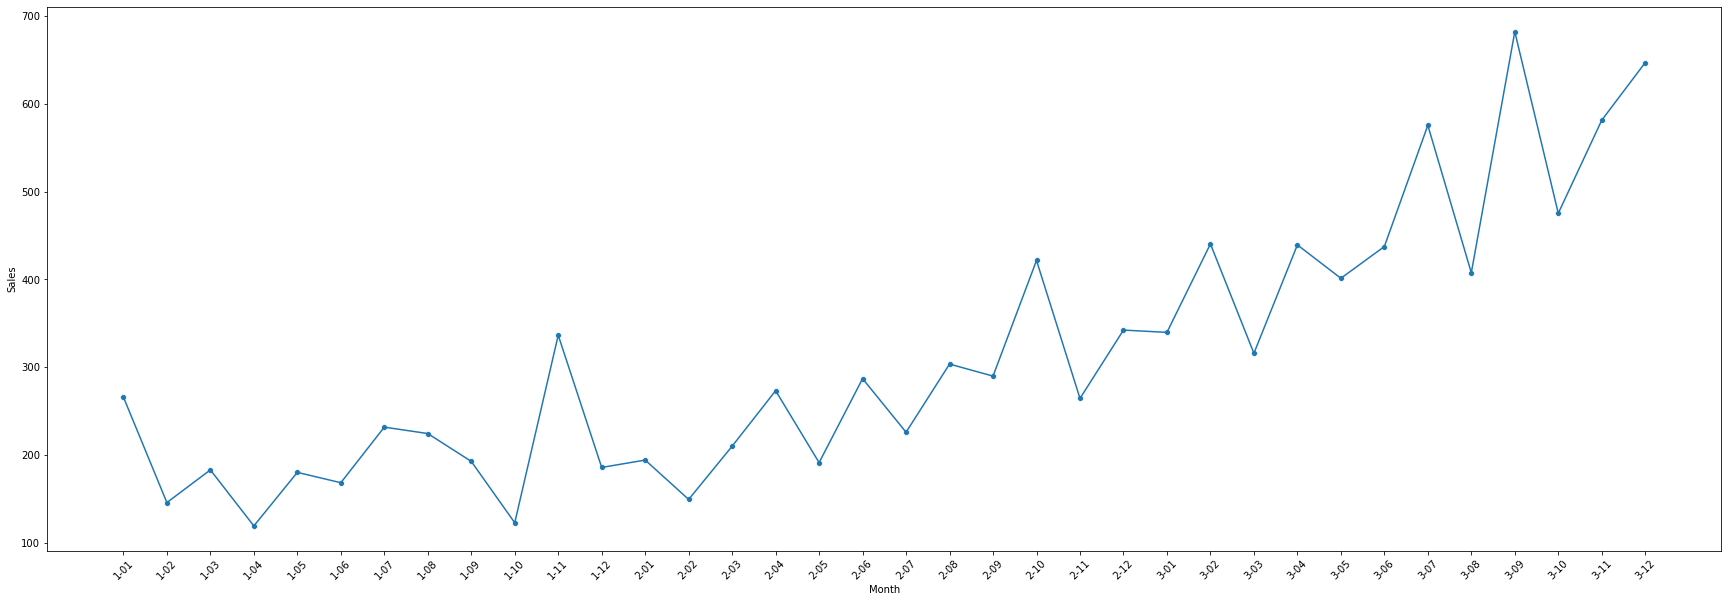

In [6]:
plt.figure(figsize=(30,10))
sns.scatterplot(x='Month', y='Sales', data= df_shampoo)
sns.lineplot(x='Month',y='Sales', data= df_shampoo)
plt.xticks(rotation=45)

plt.show()

Dari grafik di atas kita bisa melihat bahwa data shampoo memiliki pola trend positif; penjualan shampoo cenderung naik seiring berjalannya waktu.  
Karena adanya trend positif, maka data shampoo tidak stationer, kita perlu melakukan differencing.

In [7]:
df_shampoo_stationare= df_shampoo.copy()

In [8]:
df_shampoo_stationare['Stationare 1']=df_shampoo_stationare['Sales'].diff(1)
df_shampoo_stationare['Stationare 2']=df_shampoo_stationare['Sales'].diff(2)

In [9]:
df_shampoo_stationare.head(10)

,Month,Sales,Stationare 1,Stationare 2
1,1-01,266.0,NaN,NaN
2,1-02,145.9,-120.1,NaN
3,1-03,183.1,37.2,-82.9
4,1-04,119.3,-63.8,-26.6
5,1-05,180.3,61.0,-2.8
6,1-06,168.5,-11.8,49.2
7,1-07,231.8,63.3,51.5
8,1-08,224.5,-7.3,56.0
9,1-09,192.8,-31.7,-39.0
10,1-10,122.9,-69.9,-101.6


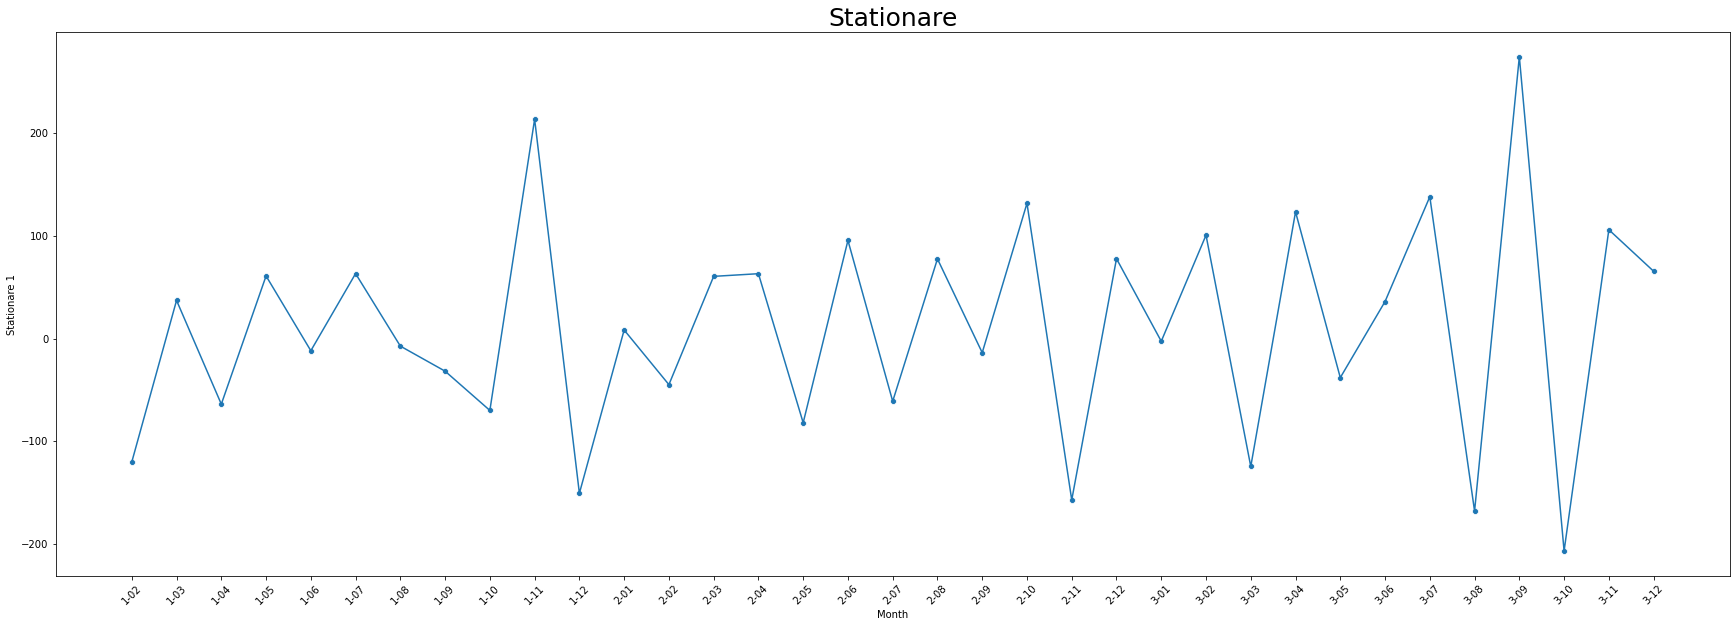

In [10]:
plt.figure(figsize=(30,10))
sns.scatterplot(x='Month', y='Stationare 1', data= df_shampoo_stationare)
sns.lineplot(x='Month',y='Stationare 1', data= df_shampoo_stationare)
plt.xticks(rotation=45)
plt.title('Stationare', size=25)

plt.show()

## ACF PACF

Model Specification (stationary condition) :  
1. PACF Cut off lag p, ACF Tails Off --> AR(p)  
1. ACF Cut off lag q, PACF Tails Off --> MA(q)  
1. PACF Cut off lag p, ACF Cut off lag q --> AR(p) or MA(q)  
1. ACF and PACF tails off -->  choose all possible combination  

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

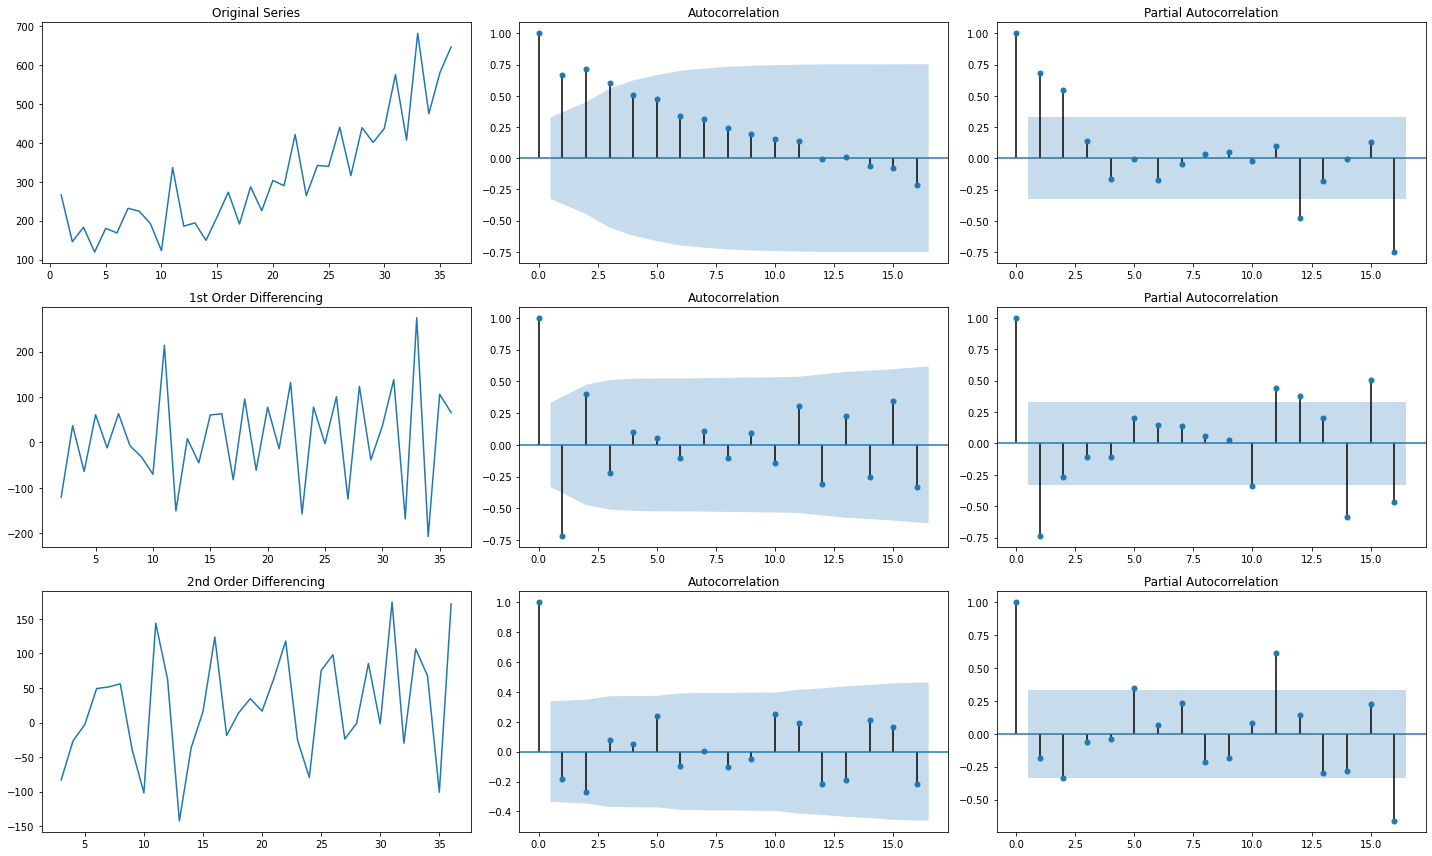

In [12]:
#original
fig,axes= plt.subplots(3,3, figsize=(20,12))
axes[0,0].plot(df_shampoo['Sales']);axes[0,0].set_title('Original Series')
plot_acf(df_shampoo['Sales'],ax=axes[0,1])
plot_pacf(df_shampoo['Sales'],ax=axes[0,2])

#1st differencing
axes[1,0].plot(df_shampoo['Sales'].diff());axes[1,0].set_title('1st Order Differencing')
plot_acf(df_shampoo['Sales'].diff().dropna(),ax=axes[1,1])
plot_pacf(df_shampoo['Sales'].diff().dropna(),ax=axes[1,2])

#2nd differencing
axes[2,0].plot(df_shampoo['Sales'].diff(2));axes[2,0].set_title('2nd Order Differencing')
plot_acf(df_shampoo['Sales'].diff(2).dropna(),ax=axes[2,1])
plot_pacf(df_shampoo['Sales'].diff(2).dropna(),ax=axes[2,2])

plt.tight_layout()

* 1st order differencing cukup untuk mencapai stationarity
* baik ACF maupun PACF memiliki bentuk cut off di lag 2
* Dari pengamatan di atas, kita bisa mencoba model ARIMA (2,1,0) dan ARIMA(0,1,2)

* perhatikan bahwa, karena data yang kita pakai adalah data differencing order 1, maka lag data dimulai dari lag 1 (data awal Nan).

## Modeling

In [13]:
df_shampoo_i=df_shampoo.copy()
df_shampoo_i['1st order'] = df_shampoo_i['Sales'].diff(1)
df_shampoo_i['lag 2 Sales stationary']=df_shampoo_i['1st order'].shift(2)
df_shampoo_i.head(10)
# ARIMA (2,1,0)

,Month,Sales,1st order,lag 2 Sales stationary
1,1-01,266.0,NaN,NaN
2,1-02,145.9,-120.1,NaN
3,1-03,183.1,37.2,NaN
4,1-04,119.3,-63.8,-120.1
5,1-05,180.3,61.0,37.2
6,1-06,168.5,-11.8,-63.8
7,1-07,231.8,63.3,61.0
8,1-08,224.5,-7.3,-11.8
9,1-09,192.8,-31.7,63.3
10,1-10,122.9,-69.9,-7.3


In [14]:
from statsmodels.tsa.arima_model import ARIMA

model= ARIMA(df_shampoo['Sales'], order=(2,1,0))
model_fit= model.fit()

In [15]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -197.814
Method:                       css-mle   S.D. of innovations             67.833
Date:                Wed, 28 Jul 2021   AIC                            403.628
Time:                        08:34:04   BIC                            409.849
Sample:                             1   HQIC                           405.775
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.6505      4.907      2.374      0.018       2.034      21.267
ar.L1.D.Sales    -1.0223      0.167     -6.109      0.000      -1.350      -0.694
ar.L2.D.Sales    -0.3655      0.167     

## Forecasting

In [16]:
forecast_length= 6 #prediksi penjualan pada 6 periode mendatang
forecast_result= model_fit.forecast(forecast_length)

In [17]:
print('forecasted value', forecast_result[0])

forecasted value [568.90833205 652.48172544 623.37109002 650.40223831 661.2283603
 668.09941349]


In [18]:
print('forecasted value standard error', forecast_result[1])

forecasted value standard error [67.83250468 67.84940696 81.1874517  84.32960399 88.92625749 94.05873131]


In [19]:
print('forecasted value confidence interval', forecast_result[2])

forecasted value confidence interval [[435.9590659  701.8575982 ]
 [519.49933143 785.46411945]
 [464.24660869 782.49557135]
 [485.11925167 815.68522495]
 [486.93609835 835.52062226]
 [483.7476877  852.45113928]]


In [20]:
month= []
for i in range(1,forecast_length+1):
    month.append('4-'+str(i))

In [21]:
df_shampoo.tail()

,Month,Sales
32,3-08,407.6
33,3-09,682.0
34,3-10,475.3
35,3-11,581.3
36,3-12,646.9


In [22]:
df_sales_F= pd.DataFrame({
    'Month':month,
    'Sales': forecast_result[0]
})

In [23]:
df_sales_F

,Month,Sales
0,4-1,568.908332
1,4-2,652.481725
2,4-3,623.371090
3,4-4,650.402238
4,4-5,661.228360
5,4-6,668.099413


In [24]:
df_sales_F= df_shampoo[-1:].append(df_sales_F)

In [25]:
df_sales_F

,Month,Sales
36,3-12,646.900000
0,4-1,568.908332
1,4-2,652.481725
2,4-3,623.371090
3,4-4,650.402238
4,4-5,661.228360
5,4-6,668.099413


In [26]:
df_forecast= pd.DataFrame({
    'Month':month,
    'forecast': forecast_result[0],
    'se': forecast_result[1],
    'lower': forecast_result[2][:,0],
    'upper': forecast_result[2][:,1]
})
df_forecast

,Month,forecast,se,lower,upper
0,4-1,568.908332,67.832505,435.959066,701.857598
1,4-2,652.481725,67.849407,519.499331,785.464119
2,4-3,623.371090,81.187452,464.246609,782.495571
3,4-4,650.402238,84.329604,485.119252,815.685225
4,4-5,661.228360,88.926257,486.936098,835.520622
5,4-6,668.099413,94.058731,483.747688,852.451139


In [27]:
import plotly.graph_objects as go

In [28]:
fig= go.Figure(go.Scatter(name='true', x=df_shampoo['Month'], y=df_shampoo['Sales']))
fig.add_trace(go.Scatter(name='forecast', x=df_sales_F['Month'],y=df_sales_F['Sales']))
fig.add_trace(go.Scatter(name='upper bound', x= df_forecast['Month'],y=df_forecast['upper']))
fig.add_trace(go.Scatter(name='lower bound', x= df_forecast['Month'],y=df_forecast['lower']))

fig.update_xaxes(rangeslider_visible=True)
fig.show()

Latihan:
* Dengan dataset shampoo, lakukan forecasting data penjualan shampoo 6 periode ke depan, dengan model ARIMA(0,1,2)
    * Bandingkan hasil prediksi dengan yang kita lakukan di kelas
    
* Dengan dataset harga saham Indofood:
    * Lakukan prediksi harga saham (`Close`) Indofood selama 4 hari ke depan

In [29]:
model= ARIMA(df_shampoo['Sales'], order=(0,1,2))
model_fit= model.fit()

In [30]:
forecast_result= model_fit.forecast(forecast_length)
print('forecasted value', forecast_result[0])

forecasted value [590.68157117 607.05117162 617.2227011  627.39423057 637.56576005
 647.73728953]


In [31]:
df_sales_F= pd.DataFrame({
    'Month':month,
    'Sales': forecast_result[0]
})

In [32]:
df_sales_F= df_shampoo[-1:].append(df_sales_F)

In [33]:
df_forecast= pd.DataFrame({
    'Month':month,
    'forecast': forecast_result[0],
    'se': forecast_result[1],
    'lower': forecast_result[2][:,0],
    'upper': forecast_result[2][:,1]
})
df_forecast

,Month,forecast,se,lower,upper
0,4-1,590.681571,61.594090,469.959373,711.403769
1,4-2,607.051172,64.426954,480.776663,733.325680
2,4-3,617.222701,73.916451,472.349119,762.096284
3,4-4,627.394231,82.319203,466.051557,788.736904
4,4-5,637.565760,89.940317,461.285977,813.845543
5,4-6,647.737290,96.964272,457.690808,837.783771


In [34]:
fig= go.Figure(go.Scatter(name='true', x=df_shampoo['Month'], y=df_shampoo['Sales']))
fig.add_trace(go.Scatter(name='forecast', x=df_sales_F['Month'],y=df_sales_F['Sales']))
fig.add_trace(go.Scatter(name='upper bound', x= df_forecast['Month'],y=df_forecast['upper']))
fig.add_trace(go.Scatter(name='lower bound', x= df_forecast['Month'],y=df_forecast['lower']))

fig.update_xaxes(rangeslider_visible=True)
fig.show()

Data Saham

In [35]:
df= pd.read_csv('INDF.JK.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-07-27,6500.0,6525.0,6450.0,6475.0,6475.0,6303500
1,2020-07-28,6500.0,6500.0,6400.0,6425.0,6425.0,9564800
2,2020-07-29,6425.0,6450.0,6350.0,6400.0,6400.0,7944800
3,2020-07-30,6500.0,6500.0,6400.0,6450.0,6450.0,10514000
4,2020-08-03,6475.0,6550.0,6300.0,6475.0,6475.0,12457500
...,...,...,...,...,...,...,...
235,2021-07-19,6625.0,6675.0,6550.0,6650.0,6650.0,6565300
236,2021-07-21,6650.0,6675.0,6500.0,6525.0,6525.0,8853700
237,2021-07-22,6525.0,6575.0,6475.0,6525.0,6525.0,6293400
238,2021-07-23,6525.0,6575.0,6450.0,6475.0,6475.0,6496900


In [36]:
df['Date']=pd.to_datetime(df['Date'])

In [37]:
df=df.loc[:,['Date','Close']]

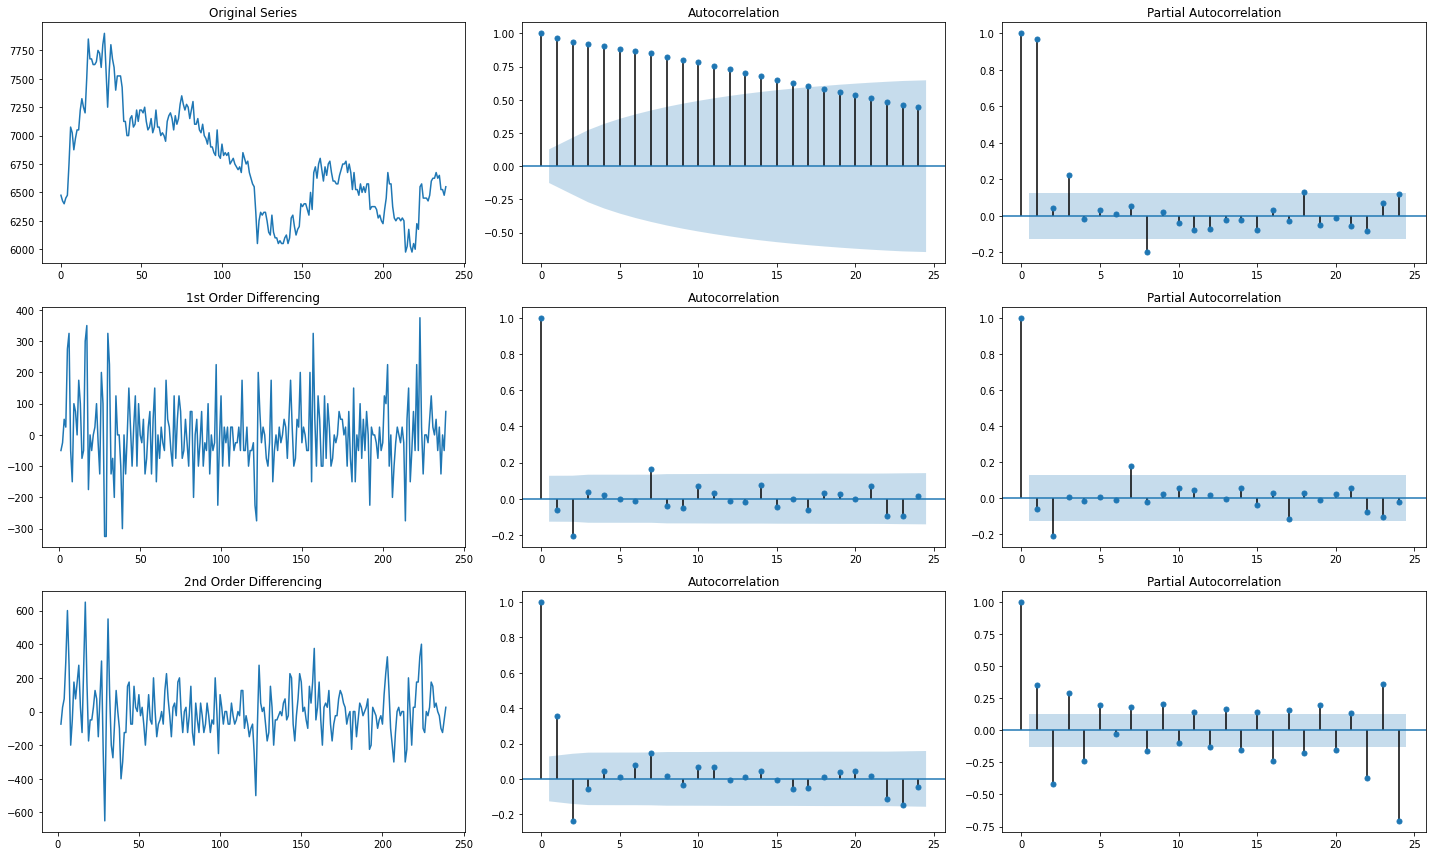

In [38]:
#original
fig,axes= plt.subplots(3,3, figsize=(20,12))
axes[0,0].plot(df['Close']);axes[0,0].set_title('Original Series')
plot_acf(df['Close'],ax=axes[0,1])
plot_pacf(df['Close'],ax=axes[0,2])

#1st differencing
axes[1,0].plot(df['Close'].diff());axes[1,0].set_title('1st Order Differencing')
plot_acf(df['Close'].diff().dropna(),ax=axes[1,1])
plot_pacf(df['Close'].diff().dropna(),ax=axes[1,2])

#2nd differencing
axes[2,0].plot(df['Close'].diff(2));axes[2,0].set_title('2nd Order Differencing')
plot_acf(df['Close'].diff(2).dropna(),ax=axes[2,1])
plot_pacf(df['Close'].diff(2).dropna(),ax=axes[2,2])

plt.tight_layout()

* 1st order differencing cukup untuk mencapai stationarity
* baik ACF maupun PACF memiliki bentuk cut off di lag 2
* Dari pengamatan di atas, kita bisa mencoba model ARIMA (2,1,0) dan ARIMA(0,1,2)

In [39]:
model= ARIMA(df['Close'], order=(2,1,0))
model_fit= model.fit()
forecast_length= 4
forecast_result= model_fit.forecast(forecast_length)

In [40]:
pd.DataFrame(pd.date_range(start="2021-07-26",end="2021-07-31"))

,0
0,2021-07-26
1,2021-07-27
2,2021-07-28
3,2021-07-29
4,2021-07-30
5,2021-07-31


In [41]:
date=pd.date_range(start="2021-07-27",end="2021-07-30")
date

DatetimeIndex(['2021-07-27', '2021-07-28', '2021-07-29', '2021-07-30'], dtype='datetime64[ns]', freq='D')

In [42]:
df_sales_F= pd.DataFrame({
    'Date':date,
    'Close': forecast_result[0]
})

In [43]:
df_sales_F= df[-1:].append(df_sales_F)
df_sales_F

,Date,Close
239,2021-07-26,6550.000000
0,2021-07-27,6555.210634
1,2021-07-28,6539.313575
2,2021-07-29,6539.888953
3,2021-07-30,6543.662807


In [44]:
df_forecast= pd.DataFrame({
    'Date':date,
    'forecast': forecast_result[0],
    'se': forecast_result[1],
    'lower': forecast_result[2][:,0],
    'upper': forecast_result[2][:,1]
})
df_forecast

,Date,forecast,se,lower,upper
0,2021-07-27,6555.210634,111.033468,6337.589036,6772.832232
1,2021-07-28,6539.313575,151.022678,6243.314564,6835.312585
2,2021-07-29,6539.888953,170.650183,6205.420741,6874.357165
3,2021-07-30,6543.662807,189.802264,6171.657206,6915.668407


In [45]:
fig= go.Figure(go.Scatter(name='true', x=df['Date'], y=df['Close']))
fig.add_trace(go.Scatter(name='forecast', x=df_sales_F['Date'],y=df_sales_F['Close']))
fig.add_trace(go.Scatter(name='upper bound', x= df_forecast['Date'],y=df_forecast['upper']))
fig.add_trace(go.Scatter(name='lower bound', x= df_forecast['Date'],y=df_forecast['lower']))

fig.update_xaxes(rangeslider_visible=True)
fig.show()

# Time Series with Feature Engineering

Analyze data opsd_germany_daily.csv  
build a time series model using linear regression  
target : Consumption  
feature : Date  
FE Date 1 : year, month, day, weekday  
FE Date 2 : year, month, day, weekday, year 2009, year > 2014, christmas, winter  
Split data   
training : 2006 - 2015  
testing : 2016 - end  
Compare the result (FE1,FE2) using following evaluation metrics :  
explained variance  
mean square log error  
r2  
MAE  
MSE  
RMSE  
plot test data, FE Date 1 forecasting result, FE Date 2 forecasting result   


https://www.kaggle.com/mvianna10/germany-electricity-power-for-20062017

In [46]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression

## Data

In [47]:
df= pd.read_csv('opsd_germany_daily.csv')
df

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


In [48]:
df.isna().sum()

Date              0
Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
dtype: int64

## Date Feature Engineering

In [49]:
df['Date']=pd.to_datetime(df['Date'])
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         4383 non-null   datetime64[ns]
 1   Consumption  4383 non-null   float64       
 2   Wind         2920 non-null   float64       
 3   Solar        2188 non-null   float64       
 4   Wind+Solar   2187 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 171.3 KB


In [51]:
df['year']=df['Date'].dt.year
df['month']=df['Date'].dt.month
df['day']=df['Date'].dt.day
df['weekday']=df['Date'].dt.weekday

In [52]:
df[['year','month','day','weekday']]

,year,month,day,weekday
0,2006,1,1,6
1,2006,1,2,0
2,2006,1,3,1
3,2006,1,4,2
4,2006,1,5,3
...,...,...,...,...
4378,2017,12,27,2
4379,2017,12,28,3
4380,2017,12,29,4
4381,2017,12,30,5


In [53]:
cat_features=['month','day','weekday']
transformer= ColumnTransformer([
    ('one hot', OneHotEncoder(drop='first'),cat_features)
], remainder='passthrough')

## EDA

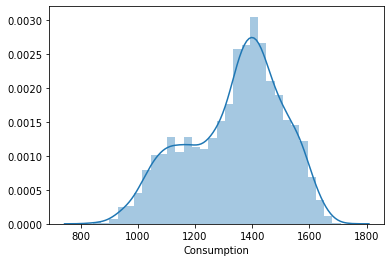

In [54]:
sns.distplot(df['Consumption'])

In [55]:
import plotly.express as px
import plotly.graph_objects as go

fig= go.Figure([go.Scatter(name='true',x=df['Date'],y=df['Consumption'])])
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [56]:
df[~df['Wind'].isna()] # data yang kolom Wind bukan NaN

,Date,Consumption,Wind,Solar,Wind+Solar,year,month,day,weekday
1461,2010-01-01,1057.37200,48.709,NaN,NaN,2010,1,1,4
1462,2010-01-02,1161.04200,24.628,NaN,NaN,2010,1,2,5
1463,2010-01-03,1132.06900,22.963,NaN,NaN,2010,1,3,6
1464,2010-01-04,1346.25000,59.318,NaN,NaN,2010,1,4,0
1465,2010-01-05,1457.37400,41.624,NaN,NaN,2010,1,5,1
...,...,...,...,...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,27,2
4379,2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,28,3
4380,2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,29,4
4381,2017-12-30,1215.44897,721.247,7.467,728.714,2017,12,30,5


In [57]:
df[~df['Solar'].isna()]

,Date,Consumption,Wind,Solar,Wind+Solar,year,month,day,weekday
2191,2012-01-01,948.12800,227.465,6.587,234.052,2012,1,1,6
2192,2012-01-02,1269.58100,207.327,6.574,213.901,2012,1,2,0
2193,2012-01-03,1334.74500,473.468,24.679,498.147,2012,1,3,1
2194,2012-01-04,1347.13600,499.804,14.681,514.485,2012,1,4,2
2195,2012-01-05,1376.65800,523.851,5.071,528.922,2012,1,5,3
...,...,...,...,...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,27,2
4379,2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,28,3
4380,2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,29,4
4381,2017-12-30,1215.44897,721.247,7.467,728.714,2017,12,30,5


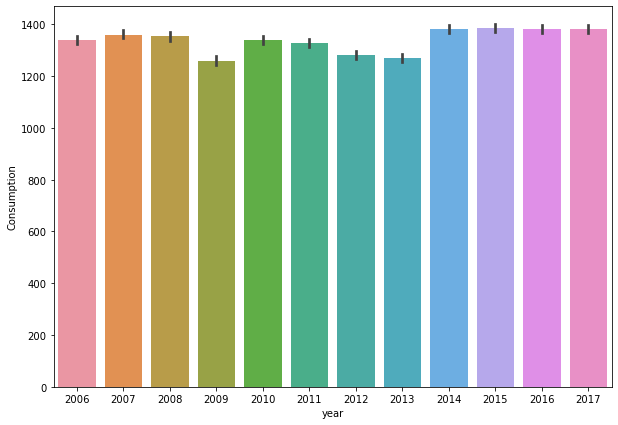

In [58]:
plt.figure(figsize=(10,7))
sns.barplot(x='year',y='Consumption', data=df)

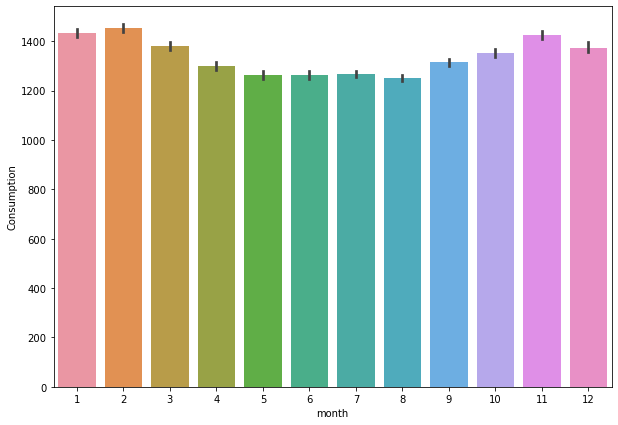

In [59]:
plt.figure(figsize=(10,7))
sns.barplot(x='month', y='Consumption', data=df)

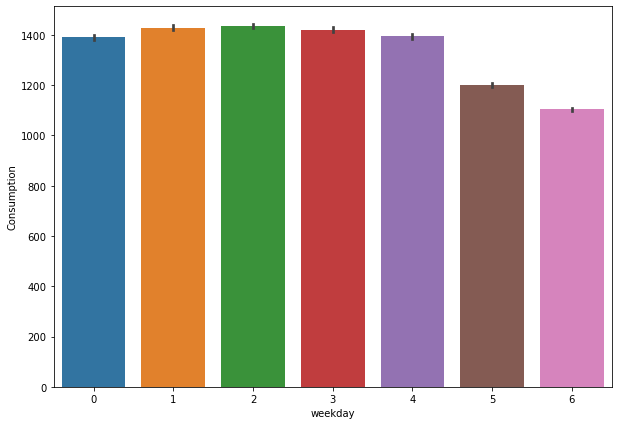

In [60]:
plt.figure(figsize=(10,7))
sns.barplot(x='weekday', y= 'Consumption', data=df)

## Modeling Benchmark

In [61]:
df_train=df[df['year'] <2016]
x_train= df_train[['year','month','day','weekday']]
y_train= df_train['Consumption']

df_test=df[df['year'] >=2016]
x_test= df_test[['year','month','day','weekday']]
y_test= df_test['Consumption']

In [62]:
transformer.fit(x_train)
x_train_preprocessed= transformer.transform(x_train)
x_test_preprocessed= transformer.transform(x_test)

In [63]:
import sklearn.metrics as metrics
def regression_result(y_true, y_pred):
    # Regression Metrics
    explained_variance= metrics.explained_variance_score(y_true,y_pred)
    mae=metrics.mean_absolute_error(y_true,y_pred)
    mse=metrics.mean_squared_error(y_true,y_pred)
    msle= metrics.mean_squared_log_error(y_true,y_pred)
    median_absolute_error= metrics.median_absolute_error(y_true,y_pred)
    r2=metrics.r2_score(y_true,y_pred)
    print('explained variance', round(explained_variance,4))
    print('mean squared log error', round(msle,4))
    print('r2', round(r2,4))
    print('MAE', round(mae,4))
    print('MSE', round(mse,4))
    print('RMSE', round(mse**(1/2),4))
    
    sns.scatterplot(y_pred,y_true-y_pred)
    

In [64]:
model=LinearRegression()
model.fit(x_train_preprocessed, y_train)
y_pred_train=model.predict(x_train_preprocessed)
y_pred= model.predict(x_test_preprocessed)

explained variance 0.7287
mean squared log error 0.0046
r2 0.7287
MAE 61.954
MSE 7394.1808
RMSE 85.9894


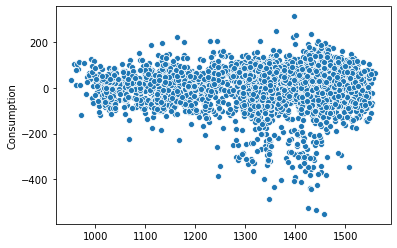

In [65]:
regression_result(y_train,y_pred_train)

explained variance 0.8069
mean squared log error 0.0039
r2 0.7239
MAE 66.0505
MSE 7245.0027
RMSE 85.1176


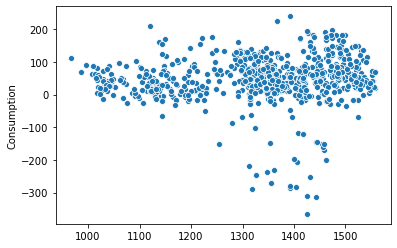

In [66]:
regression_result(y_test,y_pred)

In [67]:
df_test['y_pred']=y_pred

<ipython-input-67-fdd5adff2c7d>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [68]:
fig= go.Figure([go.Scatter(name='true', x= df_test['Date'],y=df_test['Consumption'])])
fig.add_trace(go.Scatter(name='prediction', x=df_test['Date'], y= df_test['y_pred']))
fig.update_xaxes(rangeslider_visible=True)
fig.show()

## More Feature Engineering
FE Date 2 : year, month, day, weekday, year 2009, year > 2014, christmas, winter


In [69]:
df

,Date,Consumption,Wind,Solar,Wind+Solar,year,month,day,weekday
0,2006-01-01,1069.18400,NaN,NaN,NaN,2006,1,1,6
1,2006-01-02,1380.52100,NaN,NaN,NaN,2006,1,2,0
2,2006-01-03,1442.53300,NaN,NaN,NaN,2006,1,3,1
3,2006-01-04,1457.21700,NaN,NaN,NaN,2006,1,4,2
4,2006-01-05,1477.13100,NaN,NaN,NaN,2006,1,5,3
...,...,...,...,...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,27,2
4379,2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,28,3
4380,2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,29,4
4381,2017-12-30,1215.44897,721.247,7.467,728.714,2017,12,30,5


In [70]:
df['2009']= np.where(df['year']==2009,1,0)
df['>2014']= np.where(df['year']>2014,1,0)
christmas= (df['month']==12)&((df['day']>=25)&(df['day']<=31))|(df['month']==1)&((df['day']>=1)&(df['day']<=7))
df['christmas']=np.where(christmas,1,0)

winter=df['month'].isin([12,1,2,3])
df['winter']=np.where(winter,1,0)

In [71]:
df_train=df[df['year'] <2016]
x_train= df_train[['year','month','day','weekday','2009','>2014','christmas','winter']]
y_train= df_train['Consumption']

df_test=df[df['year'] >=2016]
x_test= df_test[['year','month','day','weekday','2009','>2014','christmas','winter']]
y_test= df_test['Consumption']

In [72]:
transformer.fit(x_train)
x_train_preprocessed= transformer.transform(x_train)
x_test_preprocessed=transformer.transform(x_test)

In [73]:
model=LinearRegression()
model.fit(x_train_preprocessed,y_train)
y_pred_train=model.predict(x_train_preprocessed)
y_pred_2=model.predict(x_test_preprocessed)

explained variance 0.81
mean squared log error 0.0033
r2 0.81
MAE 49.6287
MSE 5179.4544
RMSE 71.9684


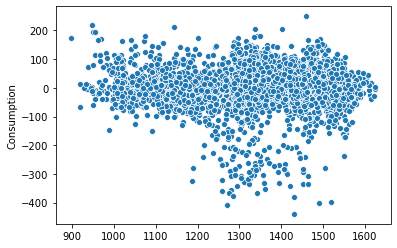

In [74]:
regression_result(y_train,y_pred_train)

explained variance 0.8069
mean squared log error 0.0039
r2 0.7239
MAE 66.0505
MSE 7245.0027
RMSE 85.1176


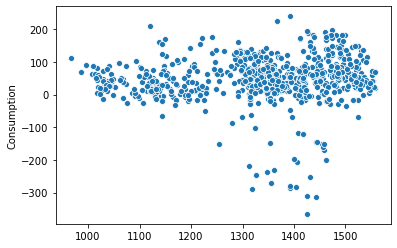

In [75]:
regression_result(y_test,y_pred)

## Before After

explained variance 0.8069
mean squared log error 0.0039
r2 0.7239
MAE 66.0505
MSE 7245.0027
RMSE 85.1176


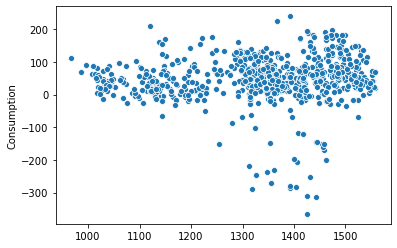

In [76]:
regression_result(y_test,y_pred)

explained variance 0.8527
mean squared log error 0.0022
r2 0.8516
MAE 41.576
MSE 3893.864
RMSE 62.4008


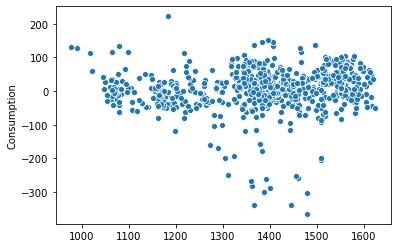

In [77]:
regression_result(y_test,y_pred_2)

In [78]:
df_test['y pred']=y_pred
df_test['y pred2']=y_pred_2

<ipython-input-78-0d37d84edef7>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-78-0d37d84edef7>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [79]:
fig= go.Figure([go.Scatter(name='true', x= df_test['Date'],y=df_test['Consumption'])])
fig.add_trace(go.Scatter(name='before', x=df_test['Date'], y= df_test['y pred']))
fig.add_trace(go.Scatter(name='after', x=df_test['Date'], y= df_test['y pred2']))
fig.update_xaxes(rangeslider_visible=True)
fig.show()

# Time Series Evaluation

* With FE Date 2, try several models and find the best model based on R-square in forward chaining strategy (5 splits)
* those models are : ridge, lasso, elastic net, SVR
* optimize the best model based on R-square using hyperparameter tuning
* check the final performance : explained variance, mean square log error, r2, MAE, MSE, RMSE
* plot test data, FE Date 1 forecasting result, FE Date 2 forecasting result, FE Date 2 (Tuned Model) forecasting result  


In [80]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score

from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [81]:
models=[
    ('Ridge',Ridge()),
    ('Lasso',Lasso()),
    ('E-net',ElasticNet()),
    ('SVR',SVR(gamma='auto')),
    ('KNN',KNeighborsRegressor())
]

In [82]:
result=[]
score=[]
names=[]
std=[]

for name,model in models:
    #Time series validation
    tscv=TimeSeriesSplit(n_splits=5)
    cv_result= cross_val_score(model, x_train_preprocessed,y_train,cv=tscv,scoring='r2')
    result.append(cv_result)
    score.append(cv_result.mean())
    std.append(cv_result.std())
    names.append(name)
    
pd.DataFrame({
    'name':names,
    'score':score,
    'std':std
})

,name,score,std
0,Ridge,0.688667,0.124313
1,Lasso,0.689898,0.121739
2,E-net,0.218973,0.097753
3,SVR,-0.019511,0.059007
4,KNN,0.553557,0.061469


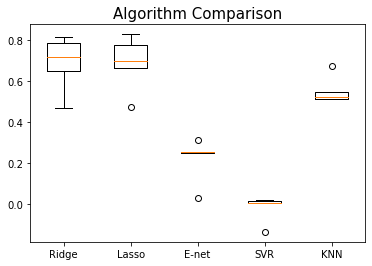

In [83]:
plt.boxplot(result,labels=names)
plt.title('Algorithm Comparison',size=15)
plt.show()

Ridge dan Lasso memiliki performa terbaik, kita coba lanjut dengan Ridge

## Hyperparameter Tunning

In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
model= Ridge()
pipe_model=Pipeline([('preprocess', transformer),('model',model)])

In [86]:
hyperparam_space={'model__alpha':[1000,100,10,1,0.1,0.01, 0.001,0.0001]}

In [87]:
tscv=TimeSeriesSplit(n_splits=5)
grid= GridSearchCV(pipe_model,
                  cv= tscv,
                  param_grid=hyperparam_space,
                  scoring='r2')

In [88]:
grid.fit(x_train,y_train)
best_score=grid.best_score_
best_param=grid.best_params_

In [89]:
print(best_score,best_param)

0.6886666615284325 {'model__alpha': 1}


In [90]:
best_model= grid.best_estimator_
best_model.fit(x_train,y_train)
y_pred_3=best_model.predict(x_test)

explained variance 0.8527
mean squared log error 0.0022
r2 0.8515
MAE 41.5988
MSE 3895.8874
RMSE 62.417


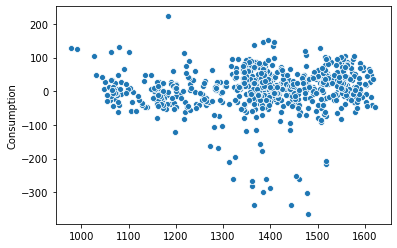

In [91]:
regression_result(y_test,y_pred_3)

In [92]:
df_test['y pred3']=y_pred_3

<ipython-input-92-c9051c17492e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [93]:
fig= go.Figure([go.Scatter(name='true', x= df_test['Date'],y=df_test['Consumption'])])
fig.add_trace(go.Scatter(name='before', x=df_test['Date'], y= df_test['y pred']))
fig.add_trace(go.Scatter(name='after', x=df_test['Date'], y= df_test['y pred2']))
fig.add_trace(go.Scatter(name='best', x=df_test['Date'], y= df_test['y pred3']))
fig.update_xaxes(rangeslider_visible=True)
fig.show()

# latihan

https://www.kaggle.com/hmavrodiev/london-bike-sharing-dataset

In [94]:
df=pd.read_csv('london_merged.csv')

In [95]:
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


Dengan data bike sharing london_merged.csv, coba eda singkat, lakukan feature extraction dan engineering. Carilah model terbaik untuk memprediksi jumlah peminjaman sepeda pada rentang waktu tertentu